In [1]:
from mesh import *

from VPINN_tri_final import *

from PROBDEF import PROBDEF

#TODO: change all types
#TODO: H1 ERROR ,interpolate error with line 
#TODO: bound error after reading the paper 

2023-11-26 20:39:23.048038: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-26 20:39:23.969392: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



my_types lib imported

generate mesh lib imported

interpolator_lib imported

settings_lib imported 



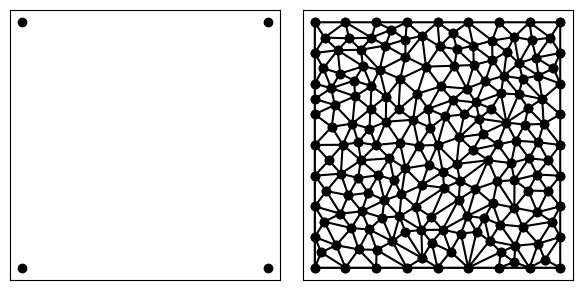

In [2]:
initializer=tf.keras.initializers.GlorotUniform(seed=42)


domain=((0,0),(1,0),(1,1),(0,1))

mesh=generate_mesh(domain,0.005)



In [3]:
tfk=tf.keras
tfkl=tf.keras.layers

In [4]:
#glorot uniform is the key 
model = tfk.models.Sequential()
model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

2023-11-26 20:39:27.079629: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
print(model.summary())
#print(model.input_shape)
#print(model.output_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
N_tests = 2
N_elements = [5, 5]

pb=PROBDEF()

params = {'scheme': 'VPINNs',
            'NN_struct': [2] + [5] * 3 + [1],
            'var_form': 1,
            'n_elements': tuple(N_elements),
            'n_test': [N_elements[0]*[N_tests], N_elements[1]*[N_tests]],
            'n_quad': 50,
            'n_bound': 80, # for every edge 
            'n_residual': 100,
            'domain': ((0.0, 1.0), (0.0, 1.0)),
            'Opt_Niter': 15000 + 1,
            'delta_test': 0.01,
            'N_test':N_tests}

In [7]:
vp=VPINN(pb,params,mesh,model)

-->mesh : 
     n_triangles :  319
     n_vertices  :  177
     n_edges     :  495
     h_max           :  0.1500397304820275
     h_min           :  0.0625
-->test_fun      : 
     order       :  2
     dof         :  606


In [8]:
#print(find_h(mesh)) #biggest and smaller of the edges 
history=vp.train(1000,0.001)

2023-11-26 20:40:26.554432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-26 20:40:26.558582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0053358495 time: 116.94408440589905
Iteration: 10 loss: 0.0033729019 time: 0.32094717025756836
Iteration: 20 loss: 0.0018793402 time: 0.34305310249328613
Iteration: 30 loss: 0.0009337991 time: 0.34856104850769043
Iteration: 40 loss: 0.0004414260 time: 0.33945345878601074
Iteration: 50 loss: 0.0002296275 time: 0.3473067283630371
Iteration: 60 loss: 0.0001598355 time: 0.38001060485839844
Iteration: 70 loss: 0.0001467138 time: 0.3443593978881836
Iteration: 80 loss: 0.0001465703 time: 0.34967708587646484
Iteration: 90 loss: 0.0001458854 time: 0.3859286308288574
Iteration: 100 loss: 0.0001444867 time: 0.39772915840148926
Iteration: 110 loss: 0.0001434859 time: 0.43208909034729004
Iteration: 120 loss: 0.0001428594 time: 0.43378543853759766
Iteration: 130 loss: 0.0001423416 time: 0.463010311126709
Iteration: 140 loss: 0.0001418424 time: 0.4837009906768799
Iteration: 150 loss: 0.0001413636 time: 0.4955160617828369
Iteration: 160 loss: 0.0001409096 time: 0.5261480808258057


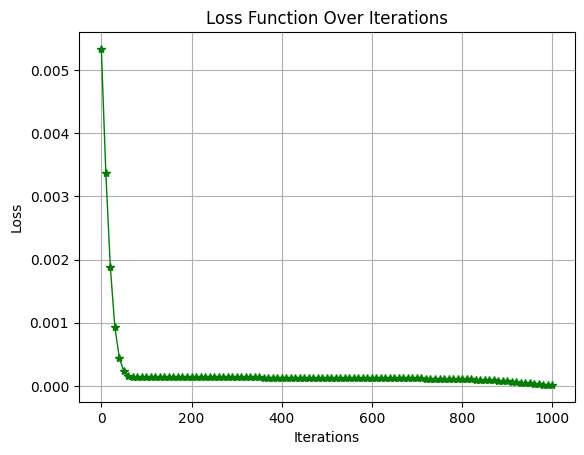

In [9]:
iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

plt.plot(iterations, history, marker='*',color='green',linewidth=1)
plt.title('Loss Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

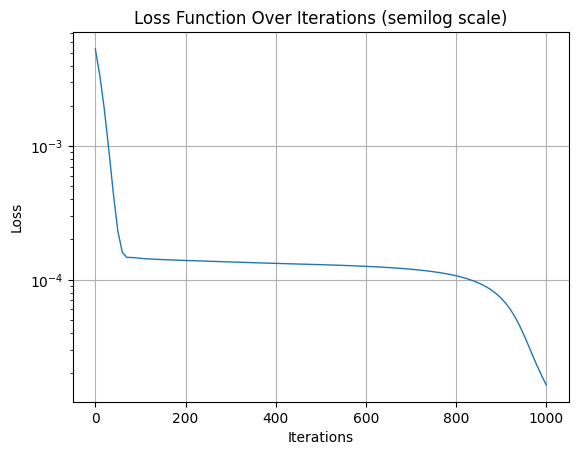

In [10]:
plt.semilogy(iterations, history,linewidth=1)
plt.title('Loss Function Over Iterations (semilog scale)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [11]:
#for the plots 

x=np.linspace(0,1,100,dtype=np.float32)

def u_exact(x,y):

    return np.cos(np.pi*(x+0.5))*np.sin(np.pi*y)


eval_exact=[u_exact(x[i],0.5) for i in range(len(x))]

eval_net=[vp.u_NN_BC(x[i],0.5) for i in range(len(x))]

eval_exact=np.array(eval_exact)
eval_net=np.array(eval_net)

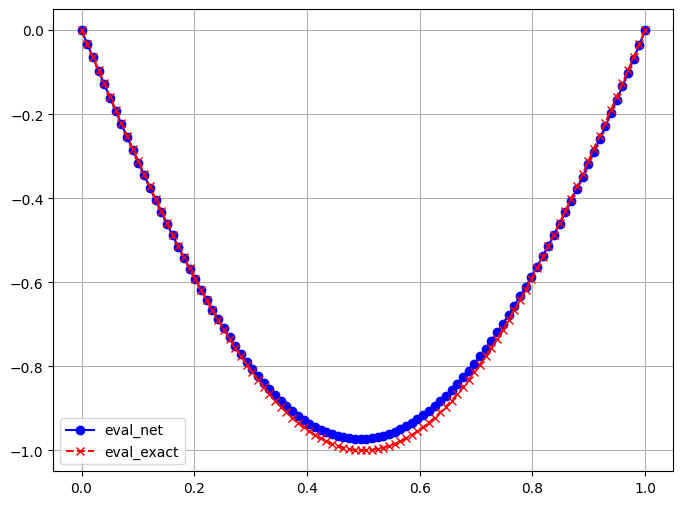

In [12]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the data
plt.plot(x, eval_net, label='eval_net', linestyle='-', marker='o', color='b')
plt.plot(x, eval_exact, label='eval_exact', linestyle='--', marker='x', color='r')
plt.grid()
plt.legend()

#if you want reproducibility put a seed


In [13]:
## Add surface plot
N = 50
x=np.linspace(0,1,N,dtype=np.float32)
XX,YY = np.meshgrid(x,x)
xx = XX.flatten()
yy = YY.flatten()

X = np.vstack((xx,yy)).transpose()
Z = [vp.u_NN_BC(x[0],x[1]) for x in X]

z = np.array(Z).flatten().reshape((N,N))

Text(0.5, 0.92, 'NN solution')

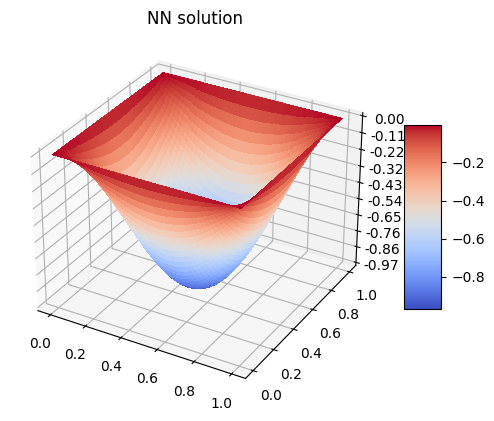

In [14]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(XX, YY, z, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 0)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('NN solution')

In [15]:
#integration
from scipy.integrate import dblquad
integral,error=dblquad(lambda x,y: (u_exact(x,y)-vp.u_NN_BC(x,y))**2, 0.0, 1.0,0.0, 1.0)

L2_error=np.sqrt(integral)
print(L2_error,error)


def L2_error(x, y):

    u_ex = lambda x, y: tf.cos(np.pi*(x+0.5))*tf.sin(np.pi*y)

    # Find the exact solution
    u_ex = u_ex(x, y)

    # Find the NN solution
    u_NN = vp.u_NN_BC(x, y)

    # Find the difference between exact and NN 
    return (u_ex - u_NN)**2

L2_2, int_error_L2 = dblquad(L2_error, 0.0, 1.0, 0.0, 1.0)
L2_error=np.sqrt(L2_2)

0.011043854960905998 4.494594443644186e-11


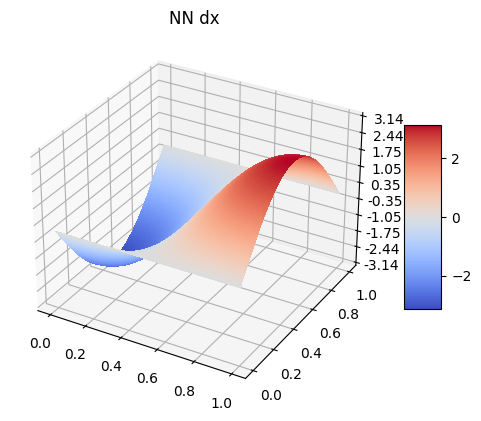

In [16]:
x = np.linspace(0, 1, 150, dtype=np.float64)
x, y = np.meshgrid(x,x)

u_ex_dx = lambda x, y: -np.pi*tf.sin(np.pi*(x + 0.5))*tf.sin(np.pi*y)
u_ex_dy = lambda x, y: np.pi*tf.cos(np.pi*(x + 0.5))*tf.cos(np.pi*y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, u_ex_dx(x,y), rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 0)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('NN dx')
plt.show()

In [17]:
def semi_H1_error(x, y):

    u_ex_dx = lambda x, y: -np.pi*tf.sin(np.pi*(x + 0.5))*tf.sin(np.pi*y)
    u_ex_dy = lambda x, y: np.pi*tf.cos(np.pi*(x + 0.5))*tf.cos(np.pi*y)

    # Find the gradient of the exact solution
    grad_ex = np.reshape(np.vstack([u_ex_dx(x, y), u_ex_dy(x, y)]), (-1, 2))

    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.reshape(tf.stack([x,y]), (-1,2)))

    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    # Return dx_error^2 + dy_error^2
    return pw_diff[:,0]*pw_diff[:,0] + pw_diff[:,1]*pw_diff[:,1]

semi_H1_err2, int_error_semi_H1 = dblquad(semi_H1_error, 0.0, 1.0, 0.0, 1.0, epsabs=5E-6)
semi_H1_err = np.sqrt(semi_H1_err2)
H1_err = np.sqrt(L2_error**2 + semi_H1_err**2)

print(f"L2 error: {L2_error} ({int_error_L2})")
print(f"semi H1 error: {semi_H1_err} ({int_error_semi_H1})")
print(f"H1 error: {H1_err}")


L2 error: 0.011043857026016289 (2.020648664544629e-09)
semi H1 error: 0.08823901473422494 (8.820128337806825e-08)
H1 error: 0.0889274451408442


-->mesh : 
     n_triangles :  2
     n_vertices  :  4
     n_edges     :  5
     h_max           :  1.4142135623730951
     h_min           :  1.0
-->test_fun      : 
     order       :  2
     dof         :  1


2023-11-26 22:22:31.818902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-26 22:22:31.823719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 232.8139383908 time: 1.8718528747558594
Iteration: 10 loss: 147.3133239106 time: 0.028176069259643555
Iteration: 20 loss: 81.4410871763 time: 0.02631974220275879
Iteration: 30 loss: 38.8858118094 time: 0.02609109878540039
Iteration: 40 loss: 15.9040063265 time: 0.02580094337463379
Iteration: 50 loss: 5.2243687221 time: 0.028178691864013672
Iteration: 60 loss: 1.1252190520 time: 0.028188467025756836
Iteration: 70 loss: 0.0749248566 time: 0.028203964233398438
Iteration: 80 loss: 0.0142488295 time: 0.03214573860168457
Iteration: 90 loss: 0.0484249388 time: 0.03158068656921387
Iteration: 100 loss: 0.0281248867 time: 0.019893884658813477
Iteration: 110 loss: 0.0060867213 time: 0.015016794204711914
Iteration: 120 loss: 0.0001351805 time: 0.014647960662841797
Iteration: 130 loss: 0.0003091605 time: 0.01483774185180664
Iteration: 140 loss: 0.0003974589 time: 0.014964580535888672
Iteration: 150 loss: 0.0001246255 time: 0.014875173568725586
Iteration: 160 loss: 0.0000059093 ti

2023-11-26 22:22:39.555433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-26 22:22:39.558222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 10.1889215553 time: 2.5810158252716064
Iteration: 10 loss: 6.3794600493 time: 0.03382611274719238
Iteration: 20 loss: 3.4833979565 time: 0.031755685806274414
Iteration: 30 loss: 1.6506021935 time: 0.031894683837890625
Iteration: 40 loss: 0.6950896239 time: 0.03180861473083496
Iteration: 50 loss: 0.2821165256 time: 0.0320889949798584
Iteration: 60 loss: 0.1450941810 time: 0.03221487998962402
Iteration: 70 loss: 0.1192768958 time: 0.03291583061218262
Iteration: 80 loss: 0.1190874343 time: 0.0325469970703125
Iteration: 90 loss: 0.1177467261 time: 0.03238058090209961
Iteration: 100 loss: 0.1149835941 time: 0.025429248809814453
Iteration: 110 loss: 0.1130185767 time: 0.02217698097229004
Iteration: 120 loss: 0.1117836036 time: 0.021083354949951172
Iteration: 130 loss: 0.1107534662 time: 0.02033233642578125
Iteration: 140 loss: 0.1097593611 time: 0.019819021224975586
Iteration: 150 loss: 0.1088103123 time: 0.02117633819580078
Iteration: 160 loss: 0.1079160625 time: 0.022187

2023-11-26 22:22:48.819009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-26 22:22:48.822942: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 2.2472912514 time: 5.2797253131866455
Iteration: 10 loss: 1.4102663728 time: 0.04357767105102539
Iteration: 20 loss: 0.7739978938 time: 0.04318976402282715
Iteration: 30 loss: 0.3713119644 time: 0.043119192123413086
Iteration: 40 loss: 0.1613851819 time: 0.04560589790344238
Iteration: 50 loss: 0.0706982134 time: 0.04318833351135254
Iteration: 60 loss: 0.0406332569 time: 0.04574441909790039
Iteration: 70 loss: 0.0349583903 time: 0.04323101043701172
Iteration: 80 loss: 0.0348860884 time: 0.0455622673034668
Iteration: 90 loss: 0.0345643208 time: 0.044413089752197266
Iteration: 100 loss: 0.0339395861 time: 0.03832602500915527
Iteration: 110 loss: 0.0334938755 time: 0.03506636619567871
Iteration: 120 loss: 0.0332102235 time: 0.03294038772583008
Iteration: 130 loss: 0.0329733639 time: 0.03363442420959473
Iteration: 140 loss: 0.0327459861 time: 0.03432512283325195
Iteration: 150 loss: 0.0325296494 time: 0.033236026763916016
Iteration: 160 loss: 0.0323262002 time: 0.03339290

2023-11-26 22:22:59.826565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-26 22:22:59.830208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 2.2472912514 time: 4.3176867961883545
Iteration: 10 loss: 1.4102663728 time: 0.04365897178649902
Iteration: 20 loss: 0.7739978938 time: 0.044762611389160156
Iteration: 30 loss: 0.3713119644 time: 0.043180227279663086
Iteration: 40 loss: 0.1613851819 time: 0.044106483459472656
Iteration: 50 loss: 0.0706982134 time: 0.0441439151763916
Iteration: 60 loss: 0.0406332569 time: 0.04108881950378418
Iteration: 70 loss: 0.0349583903 time: 0.042999267578125
Iteration: 80 loss: 0.0348860884 time: 0.04158306121826172
Iteration: 90 loss: 0.0345643208 time: 0.044176340103149414
Iteration: 100 loss: 0.0339395861 time: 0.03757810592651367
Iteration: 110 loss: 0.0334938755 time: 0.04025673866271973
Iteration: 120 loss: 0.0332102235 time: 0.034490346908569336
Iteration: 130 loss: 0.0329733639 time: 0.032778263092041016
Iteration: 140 loss: 0.0327459861 time: 0.03259873390197754
Iteration: 150 loss: 0.0325296494 time: 0.03350639343261719
Iteration: 160 loss: 0.0323262002 time: 0.0321111

2023-11-26 22:23:12.287198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-26 22:23:12.289934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.7304930431 time: 7.706660509109497
Iteration: 10 loss: 0.4599090056 time: 0.04981875419616699
Iteration: 20 loss: 0.2540975712 time: 0.04727458953857422
Iteration: 30 loss: 0.1236788045 time: 0.0475468635559082
Iteration: 40 loss: 0.0556105935 time: 0.04576301574707031
Iteration: 50 loss: 0.0262201785 time: 0.05037355422973633
Iteration: 60 loss: 0.0164975426 time: 0.04677891731262207
Iteration: 70 loss: 0.0146630674 time: 0.044666290283203125
Iteration: 80 loss: 0.0146292633 time: 0.04851126670837402
Iteration: 90 loss: 0.0145153617 time: 0.04895377159118652
Iteration: 100 loss: 0.0143074084 time: 0.04529571533203125
Iteration: 110 loss: 0.0141590446 time: 0.03995156288146973
Iteration: 120 loss: 0.0140638632 time: 0.040564537048339844
Iteration: 130 loss: 0.0139845258 time: 0.04065370559692383
Iteration: 140 loss: 0.0139088254 time: 0.04039645195007324
Iteration: 150 loss: 0.0138370819 time: 0.041600704193115234
Iteration: 160 loss: 0.0137697673 time: 0.039827585

2023-11-26 22:23:32.719520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-26 22:23:32.722585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.1226167403 time: 21.934449195861816
Iteration: 10 loss: 0.0773360753 time: 0.08779430389404297
Iteration: 20 loss: 0.0429103627 time: 0.124237060546875
Iteration: 30 loss: 0.0211214851 time: 0.12883377075195312
Iteration: 40 loss: 0.0097977295 time: 0.14816951751708984
Iteration: 50 loss: 0.0049602880 time: 0.09837126731872559
Iteration: 60 loss: 0.0033929518 time: 0.08981084823608398
Iteration: 70 loss: 0.0031074379 time: 0.11262130737304688
Iteration: 80 loss: 0.0030986803 time: 0.0978083610534668
Iteration: 90 loss: 0.0030729998 time: 0.12032127380371094
Iteration: 100 loss: 0.0030343689 time: 0.09784317016601562
Iteration: 110 loss: 0.0030068853 time: 0.09573101997375488
Iteration: 120 loss: 0.0029883970 time: 0.17642688751220703
Iteration: 130 loss: 0.0029726490 time: 0.1439058780670166
Iteration: 140 loss: 0.0029576761 time: 0.1346731185913086
Iteration: 150 loss: 0.0029434982 time: 0.12269330024719238
Iteration: 160 loss: 0.0029301449 time: 0.120199918746948

2023-11-26 22:24:18.623255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-26 22:24:18.626543: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0229214342 time: 34.32675790786743
Iteration: 10 loss: 0.0144631462 time: 0.16937828063964844
Iteration: 20 loss: 0.0080312261 time: 0.14914965629577637
Iteration: 30 loss: 0.0039635350 time: 0.1286933422088623
Iteration: 40 loss: 0.0018576331 time: 0.13001155853271484
Iteration: 50 loss: 0.0009669440 time: 0.13027119636535645
Iteration: 60 loss: 0.0006841804 time: 0.12781405448913574
Iteration: 70 loss: 0.0006351012 time: 0.13279271125793457
Iteration: 80 loss: 0.0006341140 time: 0.12826204299926758
Iteration: 90 loss: 0.0006292569 time: 0.14768171310424805
Iteration: 100 loss: 0.0006221788 time: 0.21149277687072754
Iteration: 110 loss: 0.0006172730 time: 0.21943044662475586
Iteration: 120 loss: 0.0006140143 time: 0.20901846885681152
Iteration: 130 loss: 0.0006112254 time: 0.18697476387023926
Iteration: 140 loss: 0.0006085553 time: 0.17431235313415527
Iteration: 150 loss: 0.0006060133 time: 0.1739492416381836
Iteration: 160 loss: 0.0006036033 time: 0.1858985424041

2023-11-26 22:25:20.410570: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-26 22:25:20.413649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0125009856 time: 45.94498252868652
Iteration: 10 loss: 0.0078755067 time: 0.22005176544189453
Iteration: 20 loss: 0.0043704004 time: 0.19807934761047363
Iteration: 30 loss: 0.0021618018 time: 0.21750140190124512
Iteration: 40 loss: 0.0010173971 time: 0.20087814331054688
Iteration: 50 loss: 0.0005283303 time: 0.2085113525390625
Iteration: 60 loss: 0.0003692830 time: 0.19875645637512207
Iteration: 70 loss: 0.0003403360 time: 0.24254059791564941
Iteration: 80 loss: 0.0003399984 time: 0.20453739166259766
Iteration: 90 loss: 0.0003379749 time: 0.21105527877807617
Iteration: 100 loss: 0.0003344555 time: 0.18154239654541016
Iteration: 110 loss: 0.0003319802 time: 0.20674610137939453
Iteration: 120 loss: 0.0003303887 time: 0.2505009174346924
Iteration: 130 loss: 0.0003290491 time: 0.24199318885803223
Iteration: 140 loss: 0.0003277621 time: 0.23043513298034668
Iteration: 150 loss: 0.0003265352 time: 0.2266695499420166
Iteration: 160 loss: 0.0003253754 time: 0.25153613090515

2023-11-26 22:26:41.489701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-26 22:26:41.494539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0079213111 time: 58.396641969680786
Iteration: 10 loss: 0.0049933810 time: 0.24478435516357422
Iteration: 20 loss: 0.0027723107 time: 0.23642539978027344
Iteration: 30 loss: 0.0013719562 time: 0.24629569053649902
Iteration: 40 loss: 0.0006465646 time: 0.23121881484985352
Iteration: 50 loss: 0.0003367169 time: 0.23970723152160645
Iteration: 60 loss: 0.0002359956 time: 0.23687458038330078
Iteration: 70 loss: 0.0002176985 time: 0.24154162406921387
Iteration: 80 loss: 0.0002175439 time: 0.24009060859680176
Iteration: 90 loss: 0.0002163166 time: 0.24228906631469727
Iteration: 100 loss: 0.0002141238 time: 0.25714993476867676
Iteration: 110 loss: 0.0002125843 time: 0.2814044952392578
Iteration: 120 loss: 0.0002116024 time: 0.30627965927124023
Iteration: 130 loss: 0.0002107771 time: 0.2974529266357422
Iteration: 140 loss: 0.0002099820 time: 0.2891244888305664
Iteration: 150 loss: 0.0002092221 time: 0.29061174392700195
Iteration: 160 loss: 0.0002085024 time: 0.2804679870605

2023-11-26 22:28:15.498755: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-26 22:28:15.501304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0053358495 time: 70.48168468475342
Iteration: 10 loss: 0.0033729019 time: 0.20833539962768555
Iteration: 20 loss: 0.0018793402 time: 0.20089292526245117
Iteration: 30 loss: 0.0009337991 time: 0.19872665405273438
Iteration: 40 loss: 0.0004414260 time: 0.18880438804626465
Iteration: 50 loss: 0.0002296275 time: 0.18799328804016113
Iteration: 60 loss: 0.0001598355 time: 0.1883094310760498
Iteration: 70 loss: 0.0001467138 time: 0.19111371040344238
Iteration: 80 loss: 0.0001465703 time: 0.1893305778503418
Iteration: 90 loss: 0.0001458854 time: 0.1880018711090088
Iteration: 100 loss: 0.0001444867 time: 0.18733501434326172
Iteration: 110 loss: 0.0001434859 time: 0.2875380516052246
Iteration: 120 loss: 0.0001428594 time: 0.3434159755706787
Iteration: 130 loss: 0.0001423416 time: 0.32538390159606934
Iteration: 140 loss: 0.0001418424 time: 0.3171567916870117
Iteration: 150 loss: 0.0001413636 time: 0.3137495517730713
Iteration: 160 loss: 0.0001409096 time: 0.30805540084838867


2023-11-26 22:30:21.315108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-26 22:30:21.318666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0019062930 time: 125.893146276474
Iteration: 10 loss: 0.0012089998 time: 0.41588521003723145
Iteration: 20 loss: 0.0006769653 time: 0.46132421493530273
Iteration: 30 loss: 0.0003392530 time: 0.38804197311401367
Iteration: 40 loss: 0.0001627922 time: 0.4290788173675537
Iteration: 50 loss: 0.0000866493 time: 0.39438414573669434
Iteration: 60 loss: 0.0000613558 time: 0.41350674629211426
Iteration: 70 loss: 0.0000564022 time: 0.3863229751586914
Iteration: 80 loss: 0.0000562446 time: 0.40220093727111816
Iteration: 90 loss: 0.0000559888 time: 0.37825775146484375
Iteration: 100 loss: 0.0000554745 time: 0.3914940357208252
Iteration: 110 loss: 0.0000550839 time: 0.519864559173584
Iteration: 120 loss: 0.0000548264 time: 0.6105751991271973
Iteration: 130 loss: 0.0000546131 time: 0.6131069660186768
Iteration: 140 loss: 0.0000544094 time: 0.6254794597625732
Iteration: 150 loss: 0.0000542142 time: 0.6380388736724854
Iteration: 160 loss: 0.0000540290 time: 0.6411898136138916
Iter

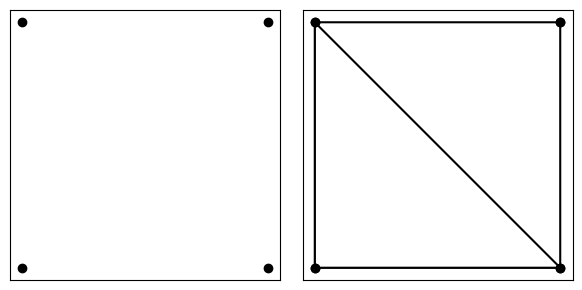

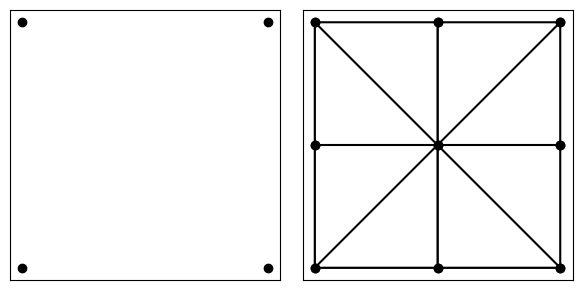

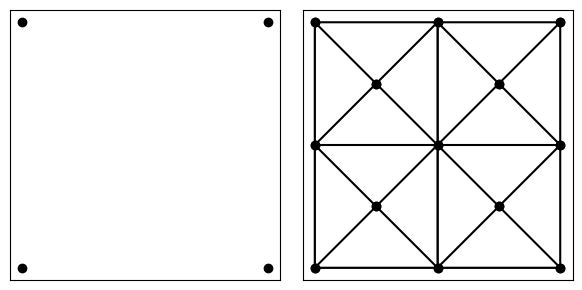

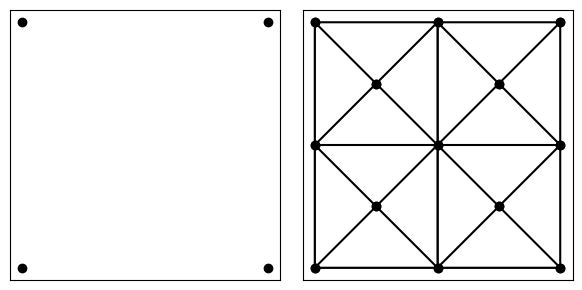

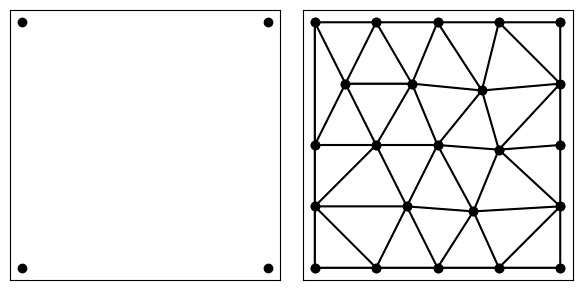

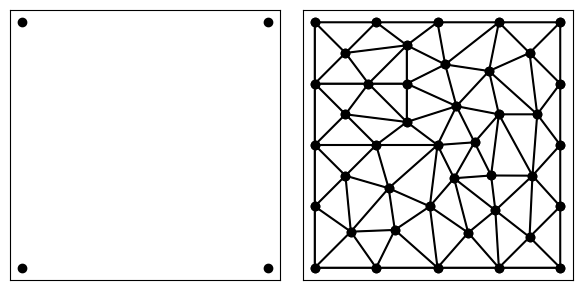

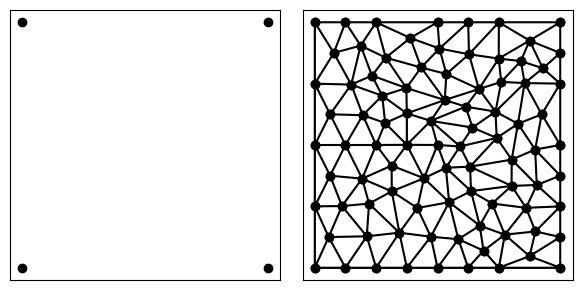

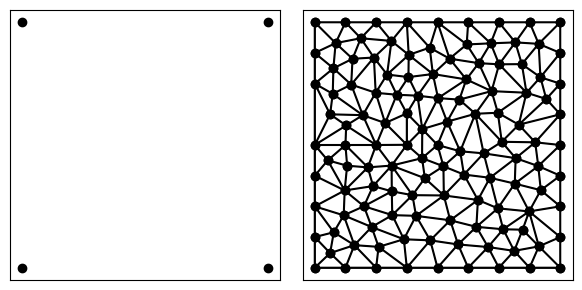

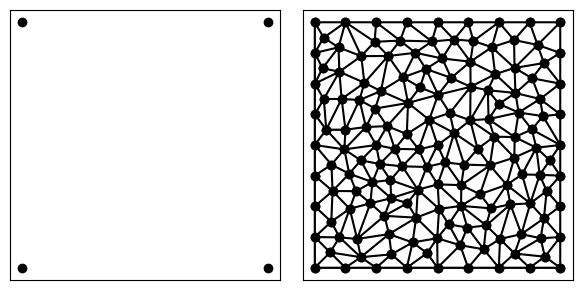

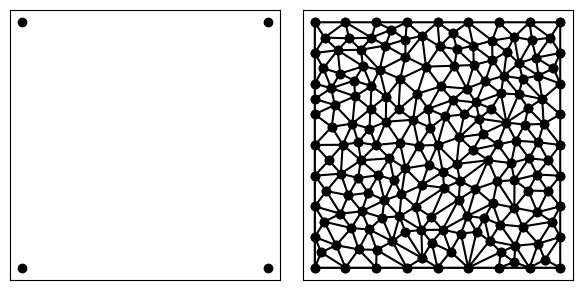

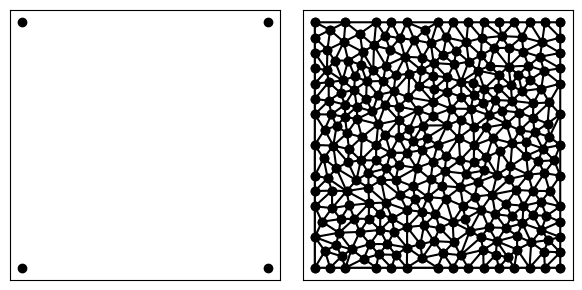

In [42]:
def restart_model():
    model = tfk.models.Sequential()
    model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))
    return model

H1 = []
L2 = []
semi = []
h = []
for refinement in [0.5, 0.2, 0.1, 0.075, 0.05, 0.025, 0.01, 0.008, 0.006, 0.005, 0.003]:
    model = restart_model()
    mesh=generate_mesh(domain,refinement)
    vp=VPINN(pb,params,mesh,model)
    history=vp.train(1000, 0.001)

    integral,error=dblquad(lambda x,y: (u_exact(x,y)-vp.u_NN_BC(x,y))**2, 0.0, 1.0,0.0, 1.0)

    L2_error=np.sqrt(integral)

    semi_H1_err2, int_error_semi_H1 = dblquad(semi_H1_error, 0.0, 1.0, 0.0, 1.0, epsabs=5E-6)
    semi_H1_err = np.sqrt(semi_H1_err2)
    H1_err = np.sqrt(L2_error**2 + semi_H1_err**2)

    H1.append(H1_err)
    semi.append(semi_H1_err)
    L2.append(L2_error)
    h.append(find_h(mesh))
    
    

0.1147777613266151
[1.         0.5        0.35355339 0.35355339 0.32034916 0.2512066
 0.12795606 0.11328445 0.10857914 0.09776953 0.06003948]
[0.31216297 0.31331217 0.30343439 0.30343439 0.2824633  0.23556627
 0.0921865  0.09407886 0.08519794 0.08892744 0.11295999]


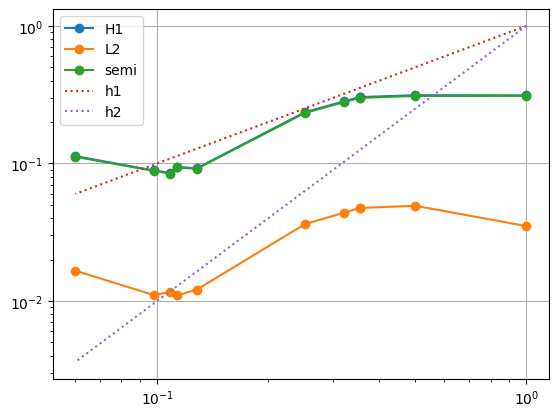

In [45]:
h = np.array(h)
# h = np.sort(h)
h_sorted = np.argsort(h)[::-1]
H1 = np.array(H1[h_sorted])
L2 = np.array(L2[h_sorted])
semi = np.array(semi[h_sorted])

h = h[h_sorted]

h_endpoints = np.array([h[0], h[-1]])

slope, intercept = np.polyfit(h, H1, 1)

print(intercept)

plt.loglog(h, H1, marker='o', label='H1')
plt.loglog(h, L2, marker='o', label='L2')
plt.loglog(h, semi, marker='o', label='semi')
plt.loglog(h, h, linestyle=':', label='h1')
plt.loglog(h, h*h, linestyle=':', label='h2')
plt.grid()
plt.legend()


print(h)
print(H1)